# Representation with a Feature Cross

In [7]:
#@title Load the imports
# from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import tensorflow as tf
import resource
from tensorflow import feature_column
from tensorflow.keras import layers
from matplotlib import pyplot as plt
# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
tf.keras.backend.set_floatx('float32')
print("Imported the modules.")

Imported the modules.


In [16]:
train_df = pd.read_csv(filepath_or_buffer="./california_housing_test.csv")
test_df = pd.read_csv(filepath_or_buffer="./california_housing_test.csv")
print("Training set:")
train_df.describe()
print("Test set:")
test_df.describe()

Training set:
Test set:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0
mean,-119.6,35.6,28.8,2599.6,530.0,1402.8,489.9,3.8,205846.3
std,2.0,2.1,12.6,2155.6,415.7,1030.5,365.4,1.9,113119.7
min,-124.2,32.6,1.0,6.0,2.0,5.0,2.0,0.5,22500.0
25%,-121.8,33.9,18.0,1401.0,291.0,780.0,273.0,2.5,121200.0
50%,-118.5,34.3,29.0,2106.0,437.0,1155.0,409.5,3.5,177650.0
75%,-118.0,37.7,37.0,3129.0,636.0,1742.8,597.2,4.7,263975.0
max,-114.5,41.9,52.0,30450.0,5419.0,11935.0,4930.0,15.0,500001.0


In [17]:
# Scale the labels
scale_factor = 1000.0
# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 
# Scale the test set's label
test_df["median_house_value"] /= scale_factor
# Shuffle the examples
train_df = train_df.reindex(np.random.permutation(train_df.index))

In [18]:
# Create an empty list that will eventually hold all feature columns.
feature_columns = []

# Create a numerical feature column to represent latitude.
latitude = tf.feature_column.numeric_column("latitude")
feature_columns.append(latitude)

# Create a numerical feature column to represent longitude.
longitude = tf.feature_column.numeric_column("longitude")
feature_columns.append(longitude)

# Convert the list of feature columns into a layer that will ultimately become
# part of the model. Understanding layers is not important right now.
fp_feature_layer = layers.DenseFeatures(feature_columns)

In [20]:
#@title Define functions to create and train a model, and a plotting function
def create_model(my_learning_rate, feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()
  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)
  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model           


def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)
  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  # Isolate the mean absolute error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]
  return epochs, rmse   


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.94, rmse.max()* 1.05])
  plt.show()  

print("Defined the create_model, train_model, and plot_the_loss_curve functions.")

Defined the create_model, train_model, and plot_the_loss_curve functions.


Epoch 1/30
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
30/30 [==============================] - 0s 3ms/step - loss: 17629.7207 - root_mean_squared_error: 132.7770
Epoch 2/30
30/30 [==============================] - 0s 2ms/step - loss: 12907.5176 - root_mean_squared_error: 113.6113
Epoch 3/30
30/30 [==============================] - 0s 2ms/step - loss: 12879.1611 - root_mean_squared_error: 113.4864
Epoch 4/30
30/30 [==============================] - 0s 2ms/step - loss: 12895.2451 - root_mean_squared_error: 113.5572
Epoch 5/30
30/30 [==============================] - 0s 2ms/step - loss: 12870.4238 - root_mean_squared_error: 113.4479
Epoch 6/30
30/30 [==============================] - 0s 3ms/step - loss: 12874.4062 - root_mean_squared_error: 113.4654
Epoch 7/30
30/30 [==============================] - 0s 3ms/step - loss: 12858.3789 - root_mean_squared_error: 113.3948
Epoch 8/30
30/30 [==============================] - 0s 3m

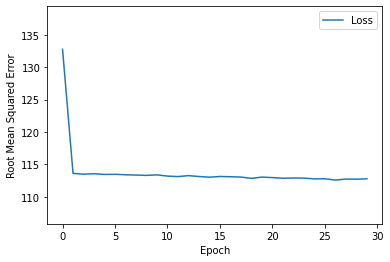


: Evaluate the new model against the test set:
Consider rewriting this model with the Functional API.
30/30 [==============================] - 0s 3ms/step - loss: 12632.4678 - root_mean_squared_error: 112.3942


[12632.4677734375, 112.39424896240234]

In [21]:
# The following variables are the hyperparameters.
learning_rate = 0.05
epochs = 30
batch_size = 100
label_name = 'median_house_value'

# Create and compile the model's topography.
my_model = create_model(learning_rate, fp_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)